In [2]:
import cv2
from matplotlib import pyplot as plt

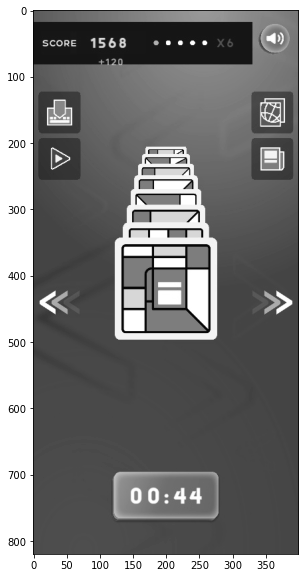

In [116]:
img = cv2.imread("images/482.jpg")
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(gray, cmap="gray")
plt.show()

In [30]:
def crop_img2(id):
    img = cv2.imread(f'image2/{id}.jpg')
#     cv2.imwrite(f"image2/rename/2{id}.jpg", img)

    W = 400
    H = 820

    sw=65
    rects = [
        (122, 7),
        (192, 7),
        (262, 7),
        (122, W-72),
        (192, W-72),
        (262, W-72),
    ]

    for i, (x,y) in enumerate(rects):
        img_crop = img[x:x+sw, y:y+sw]
#         cv2.imwrite(f"crop/{id}_{i}.jpg", img_crop)
    
    cw = 100
    cx, cy = (H-cw)//2 + 10, (W-cw)//2
    img_crop = img[cx:cx+cw, cy:cy+cw]
    img_crop = cv2.resize(img_crop, (sw, sw))
    
    return img_crop
#     cv2.imwrite(f"image2/crop/2{id}_6.jpg", img_crop)

    
import glob, os, tqdm
path = glob.glob("image2/*.jpg")
images = []
for p in tqdm.tqdm(path):
    id = os.path.split(p)[-1].split(".")[0]
    img = crop_img2(id)
    images.append(img)

100%|█████████████████████████████████████████████████████████████████████████████████| 24/24 [00:00<00:00, 207.74it/s]


In [34]:
images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images]
predict(np.asarray(images))

['trong',
 'trong',
 'trong',
 'trong',
 'trong',
 'trong',
 'trong',
 'trong',
 'trong',
 'trong',
 'trong',
 'trong',
 'trong',
 'trong',
 'trong',
 'trong',
 'trong',
 'trong',
 'trong',
 'trong',
 'trong',
 'trong',
 'trong',
 'trong']

In [36]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
from matplotlib import pyplot as plt

labels = ['cheo', 'diacau', 'muiten', 'sach', 'tamgiac', 'tinnhan', 'trong']
model = keras.models.load_model("model_v10.h5")

def crop_img(id):
    img = cv2.imread(f'images/{id}.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)
    plt.figure(figsize=(10,10))
    plt.imshow(img, cmap="gray")
    plt.show()

    W = 400
    H = 820

    images = []
    sw=65
    rects = [
        (122, 7),
        (192, 7),
        (262, 7),
        (122, W-72),
        (192, W-72),
        (262, W-72),
    ]

    for i, (x,y) in enumerate(rects):
        img_crop = img[x:x+sw, y:y+sw]
        images.append(img_crop)
        
    cw = 100
    cx, cy = (H-cw)//2 + 10, (W-cw)//2
    img_crop = img[cx:cx+cw, cy:cy+cw]
    img_crop = cv2.resize(img_crop, (sw, sw))
    plt.imshow(img_crop, cmap="gray")
    plt.show()
    images.append(img_crop)
    return np.asarray(images)
    
def predict(images):
    images = images/255
    preds = model.predict(images)
#     print(preds.max(1))
    return [labels[i] for i in preds.argmax(1)]


def predict_arrow(preds):
    if preds[-1] == "cheo":
        return "xuong"
    if preds[-1] == "trong":
        return "khongbiet"
    if preds[-1] in preds[:3]:
        return "trai"
    if preds[-1] in preds[3:6]:
        return "phai"
    return "khongbiet"

2599


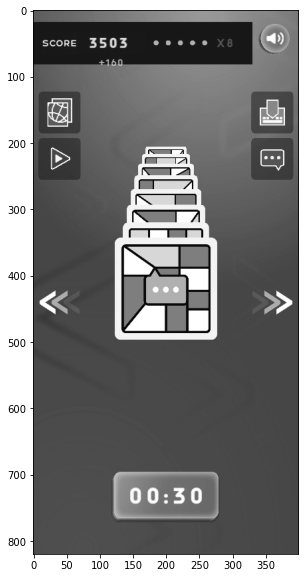

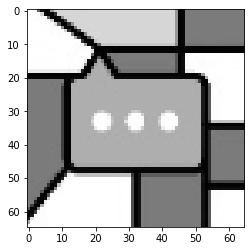

['diacau', 'tamgiac', 'trong', 'muiten', 'tinnhan', 'trong', 'tinnhan']


'phai'

In [37]:
id = np.random.randint(395,1313)
id=2599
print(id)
images = crop_img(id)
# images = crop_img(455)
preds = predict(images)
print(preds)
predict_arrow(preds)

In [8]:
import glob
paths = glob.glob("crop/*_6.jpg")
images = np.asarray([cv2.cvtColor(cv2.imread(p), cv2.COLOR_BGR2GRAY) for p in paths])
preds = predict(images)

In [ ]:
for img, p, path in list(zip(images, preds, paths)):
    plt.imshow(img, cmap="gray")
    plt.show()
    print(p, path)

In [13]:
sumpix = images.reshape(7,-1).sum(1)
(sumpix - sumpix[-1])[:6].argmax()

3